In [1]:
%pylab notebook
from importlib import reload
import pandas as pd
from scipy.optimize import curve_fit
import scipy.ndimage as flt
from scipy.stats import linregress
from matplotlib import mlab as mlab
import xarray as xr
import json
import scipy
from astropy.table import Table, Column, MaskedColumn
from astropy.io import ascii
from scipy.signal import butter, filtfilt, lfilter

def nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
    
from urllib.request import urlopen
def loader(shot_num):   # mA, Pa
    filename = 'Ti_BPP_profile_2ms_bin_averaged_Weighted_NewLP' + str(shot_num)+'.txt'
    data = pd.read_csv(filename, sep=' ')
    Table = data.to_xarray()
    Ti_time = Table['t[ms]'].data
    Ti = Table['Ti[eV]'].data
    Ti_err = Table['Ti_err[eV]'].data
    Vp = Table['Vp_cut[V]'].data
    Vp_err = Table['Vp_err[V]'].data
    Isat = Table['Isat'].data
    Ti_positions  = Table['Ti_norm_positions'].data
    

    filename = 'Te_' + str(shot_num)+'.txt'
    data = pd.read_csv(filename, sep=' ')
    Table = data.to_xarray()
    Te_time = Table['t[ms]'].data
    Te = Table['Te[eV]'].data
    Te_smooth = Table['Te_smooth'].data
    Te_pos = Table['pos'].data
    Plasma_potential = Table['Plasma_potential'].data
    return {'Ti_time':Ti_time,'Ti':Ti,'Ti_err':Ti_err,'Vp':Vp,'Vp_err':Vp_err,'Ti_positions':Ti_positions, 'Isat':Isat,  'Te_time':Te_time,'Te':Te,'Te_pos':Te_pos,'Te_smooth':Te_smooth,'Plasma_potential':Plasma_potential }

Populating the interactive namespace from numpy and matplotlib


In [2]:
a = loader(33445)
b = loader(33447)
c = loader(33449)
d = loader(33451)
e = loader(33453)

<IPython.core.display.Javascript object>


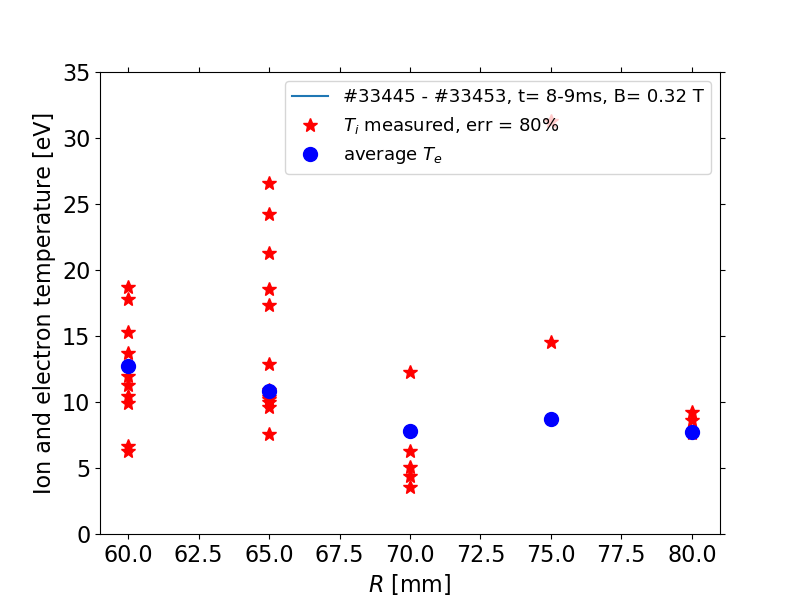

In [3]:
plt.figure(figsize = (8,6))
size = 10
plt.plot([],[], label ='#33445 - #33453, t= 8-9ms, B= 0.32 T')
plt.plot(c['Ti_positions'], c['Ti'], '*',markersize = size, color = 'red', label = '$T_i$ measured, err = 80%')
plt.plot(a['Ti_positions'], a['Ti'], '*',markersize = size, color = 'red',)
plt.plot(b['Ti_positions'], b['Ti'], '*',markersize = size, color = 'red',)
plt.plot(d['Ti_positions'], d['Ti'], '*',markersize = size, color = 'red',)
plt.plot(e['Ti_positions'], e['Ti'], '*',markersize = size, color = 'red',)

# plt.plot(a['Ti_positions'][0], np.mean(a['Ti']), 'D',markersize = 10, color = 'red',label = 'average $T_i$ ')
# plt.plot(b['Ti_positions'][0], np.mean(b['Ti']), 'D', markersize = 10, color = 'red')
# plt.plot(c['Ti_positions'][0], np.mean(c['Ti']), 'D',markersize = 10,  color = 'red')
# #plt.plot(d['Ti_positions'][0], np.mean(d['Ti']), 'D',markersize = 10,  color = 'red')
# plt.plot(e['Ti_positions'][0], np.mean(e['Ti']), 'D',markersize = 10,  color = 'red')


plt.plot(a['Ti_positions'][0], np.mean(a['Te']), 'o',markersize = size, color = 'blue',label = 'average $T_e$ ')
plt.plot(b['Ti_positions'][0], np.mean(b['Te']), 'o', markersize = size, color = 'blue')
plt.plot(c['Ti_positions'][0], np.mean(c['Te']), 'o',markersize = size,  color = 'blue')
plt.plot(d['Ti_positions'][0], np.mean(d['Te']), 'o',markersize = size,  color = 'blue')
plt.plot(e['Ti_positions'][0], np.mean(e['Te']), 'o',markersize = size,  color = 'blue')

# plt.errorbar(a['Ti_positions'][0], np.mean(a['Ti']), yerr=np.std(a['Ti']),zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1.5, capsize=4, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=1, )
# plt.errorbar(b['Ti_positions'][0], np.mean(b['Ti']), yerr=np.std(b['Ti']),zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1.5, capsize=4, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=1, )
# plt.errorbar(c['Ti_positions'][0], np.mean(c['Ti']), yerr=np.std(c['Ti']),zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1.5, capsize=4, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=1, )
# plt.errorbar(d['Ti_positions'][0], np.mean(d['Ti']), yerr=np.std(d['Ti']),zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1.5, capsize=4, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=1, )
# plt.errorbar(e['Ti_positions'][0], np.mean(e['Ti']), yerr=np.std(e['Ti']),zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1.5, capsize=4, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=1, )

# plt.errorbar(e['Ti_positions'], e['Ti'], yerr = e['Ti_err'],zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1., capsize=4, barsabove=True, errorevery=1, capthick=1, )
# plt.errorbar(a['Ti_positions'], a['Ti'], yerr = a['Ti_err'],zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1., capsize=4, barsabove=True, errorevery=1, capthick=1, )
# plt.errorbar(b['Ti_positions'], b['Ti'], yerr = b['Ti_err'],zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1., capsize=4, barsabove=True, errorevery=1, capthick=1, )
# plt.errorbar(c['Ti_positions'], c['Ti'], yerr = c['Ti_err'],zorder =3, xerr=None, fmt='None', ecolor='red',  elinewidth=1., capsize=4, barsabove=True, errorevery=1, capthick=1, )
# plt.errorbar(d['Ti_positions'], d['Ti'], yerr = d['Ti_err'],zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1., capsize=4, barsabove=True, errorevery=1, capthick=1, )

plt.legend(loc = 'upper right',fontsize = 13)
plt.xlabel('$R$ [mm]', fontsize = 16)
plt.ylabel('Ion and electron temperature [eV]', fontsize = 16)
plt.tick_params(axis='both' , labelsize=16, top = True, right = True)
#plt.grid()
plt.ylim(0,35)
plt.savefig('radial_profile_no_rfa.png')

# Estimation of separatrix position

<IPython.core.display.Javascript object>


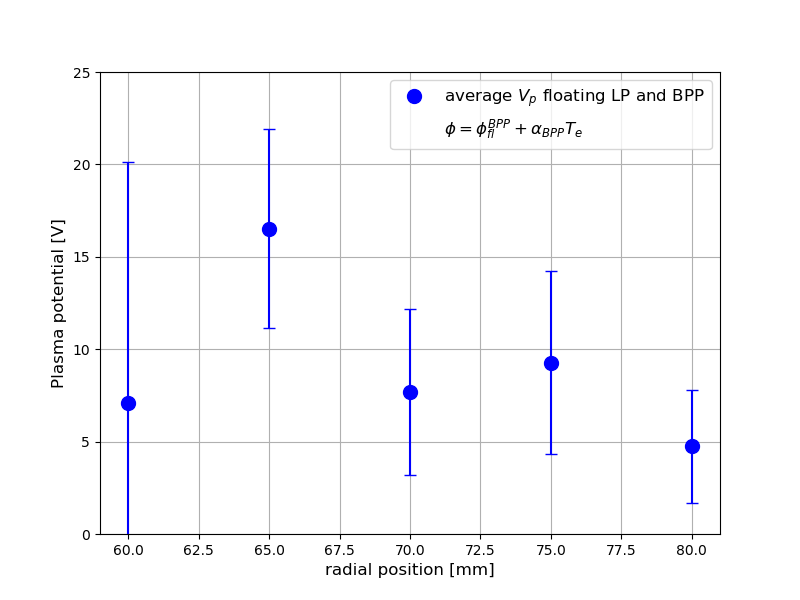

In [5]:
plt.figure(figsize = (8,6))
size = 10

# plt.plot(a['Ti_positions'][0], np.mean(a['Vp']), 'D',markersize = 10, color = 'red',label = 'average $V_p$ swept BPP ')
# plt.plot(b['Ti_positions'][0], np.mean(b['Vp']), 'D', markersize = 10, color = 'red')
# plt.plot(c['Ti_positions'][0], np.mean(c['Vp']), 'D',markersize = 10,  color = 'red')
# plt.plot(d['Ti_positions'][0], np.mean(d['Vp']), 'D',markersize = 10,  color = 'red')
# plt.plot(e['Ti_positions'][0], np.mean(e['Vp']), 'D',markersize = 10,  color = 'red')



plt.plot(a['Ti_positions'][0], np.mean(a['Plasma_potential']), 'o',markersize = size, color = 'blue',label = 'average $V_p$ floating LP and BPP ')
plt.plot(b['Ti_positions'][0], np.mean(b['Plasma_potential']), 'o', markersize = size, color = 'blue')
plt.plot(c['Ti_positions'][0], np.mean(c['Plasma_potential']), 'o',markersize = size,  color = 'blue')
plt.plot(d['Ti_positions'][0], np.mean(d['Plasma_potential']), 'o',markersize = size,  color = 'blue')
plt.plot(e['Ti_positions'][0], np.mean(e['Plasma_potential']), 'o',markersize = size,  color = 'blue')

plt.errorbar(a['Ti_positions'][0], np.mean(a['Plasma_potential']), yerr=np.std(a['Plasma_potential']),zorder =3, xerr=None, fmt='None', ecolor='blue', elinewidth=1.5, capsize=4, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=1, )
plt.errorbar(b['Ti_positions'][0], np.mean(b['Plasma_potential']), yerr=np.std(b['Plasma_potential']),zorder =3, xerr=None, fmt='None', ecolor='blue', elinewidth=1.5, capsize=4, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=1, )
plt.errorbar(c['Ti_positions'][0], np.mean(c['Plasma_potential']), yerr=np.std(c['Plasma_potential']),zorder =3, xerr=None, fmt='None', ecolor='blue', elinewidth=1.5, capsize=4, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=1, )
plt.errorbar(d['Ti_positions'][0], np.mean(d['Plasma_potential']), yerr=np.std(d['Plasma_potential']),zorder =3, xerr=None, fmt='None', ecolor='blue', elinewidth=1.5, capsize=4, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=1, )
plt.errorbar(e['Ti_positions'][0], np.mean(e['Plasma_potential']), yerr=np.std(e['Plasma_potential']),zorder =3, xerr=None, fmt='None', ecolor='blue', elinewidth=1.5, capsize=4, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=1, )
plt.plot([],[],ls ='None',label = ('$\phi = \phi^{BPP}_{fl} + α_{BPP} T_e$ '))
plt.xlabel('radial position [mm]', fontsize = 12)
plt.ylabel('Plasma potential [V]', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()
plt.ylim(0,25)
plt.savefig('radial_profile_of_Vp.png')

# Histograms

<IPython.core.display.Javascript object>


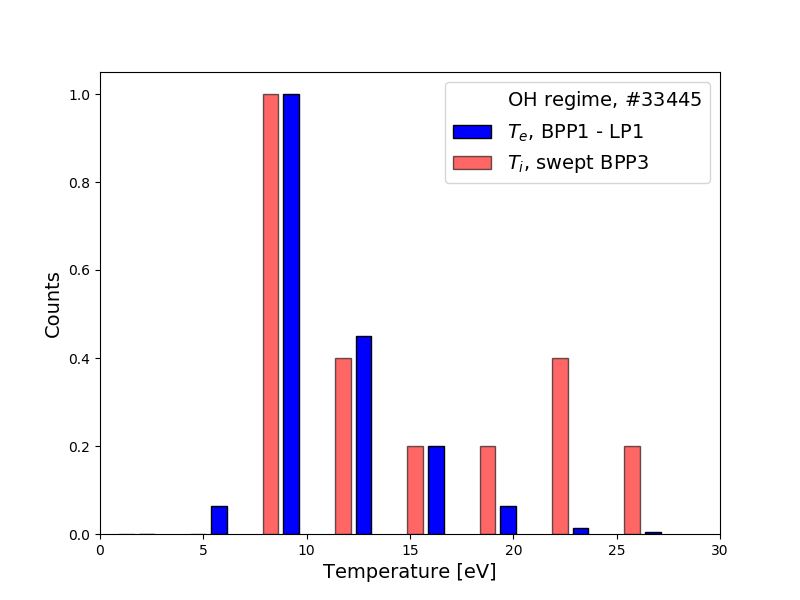

No handles with labels found to put in legend.


In [9]:
#bin_edges = np.linspace(0., 30, 8) ### 60 - 0 + 1 is the number of bins for desired spacing #####
bin_edges = np.arange(0,30,3.5)
bin_centres = bin_edges[:-1] - ((bin_edges[0] - bin_edges[1]) / 2)

PDF_1 = np.histogram(b['Ti'], bins = bin_edges)[0] /np.max(np.histogram(b['Ti'], bins = bin_edges)[0]) #/ len(Ti_SOL_2)
PDF_2 = np.histogram(a['Ti'], bins = bin_edges)[0] /np.max(np.histogram(a['Ti'], bins = bin_edges)[0]) #/ len(Ti_SOL_2)
PDF_3 = np.histogram(c['Ti'], bins = bin_edges)[0] /np.max(np.histogram(c['Ti'], bins = bin_edges)[0]) #/ len(Ti_SOL_2)
PDF_4 = np.histogram(d['Ti'], bins = bin_edges)[0] /np.max(np.histogram(d['Ti'], bins = bin_edges)[0]) #/ len(Ti_SOL_2)
######## Electron temps
TePDF_1 = np.histogram(b['Te'], bins = bin_edges)[0] / np.max(np.histogram(b['Te'], bins = bin_edges)[0])
TePDF_2 = np.histogram(a['Te'], bins = bin_edges)[0] / np.max(np.histogram(a['Te'], bins = bin_edges)[0])
TePDF_3 = np.histogram(c['Te'], bins = bin_edges)[0] / np.max(np.histogram(c['Te'], bins = bin_edges)[0])
TePDF_4 = np.histogram(d['Te'], bins = bin_edges)[0] / np.max(np.histogram(d['Te'], bins = bin_edges)[0])

fig, ax = plt.subplots(1,1, figsize=(8,6), sharex=False)
ax.set_xlabel('Temperature [eV]', fontsize=10)
ax.set_ylabel('Counts', fontsize=10)
ax.legend()

# ax[3].set_xlabel('Temperature [eV]', fontsize=10)
# ax[3].set_ylabel('Counts', fontsize=10)
# ax[3].legend()

end = 30

ax.set_xlim(0, end)

x_ticks = np.arange(0, end+1, 5)
ax.set_xticks(x_ticks)

######## Ion Temps
shot = 33447
# ax.plot([] , [], ' ',label ='OH regime, $\#$'+ str(shot)+', main SOL')
# ax.bar(bin_centres+0.5, TePDF_1, width = 0.75, edgecolor= 'black', color = 'blue', linewidth = 1, label = '$T_e$, BPP1 - LP1', alpha = 1 )
# ax.bar(bin_centres-0.5, PDF_1, width = 0.75, edgecolor= 'black', color = 'red', linewidth = 1, label = '$T_i$, swept BPP3', alpha = 0.6 )
# ax.set_xlabel('Temperature [eV]', fontsize=16)
# ax.set_ylabel('Counts', fontsize=16)
# ax.legend( fontsize=14)
# ax.tick_params(axis='both' , labelsize=16)
# plt.tight_layout()
# plt.savefig('Ti_hISTOGRAMS_1_shot_' +str(shot)+ '.png')


shot = 33445
ax.plot([] , [], ' ',label ='OH regime, $\#$'+ str(shot))
ax.bar(bin_centres+0.5, TePDF_2, width = 0.75, edgecolor= 'black', color = 'blue', linewidth = 1, label = '$T_e$, BPP1 - LP1', alpha = 1 )
ax.bar(bin_centres-0.5, PDF_2, width = 0.75, edgecolor= 'black', color = 'red', linewidth = 1, label = '$T_i$, swept BPP3', alpha = 0.6 )
ax.set_xlabel('Temperature [eV]', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend( fontsize=14)
fig.savefig('Ti_hISTOGRAMS_2_shot_'+str(shot)+'.png' )

# shot = 33449
# ax.plot([] , [], ' ',label ='L-mode, $\#$'+ str(shot)+', near SOL')
# ax.bar(bin_centres+0.5, TePDF_3, width = 0.5, edgecolor= 'black', color = 'blue', linewidth = 1, label = '$T_e$, BPP1 - LP1', alpha = 1 )
# ax.bar(bin_centres-0.5, PDF_3, width = 0.5, edgecolor= 'black', color = 'red', linewidth = 1, label = '$T_i$, swept BPP3', alpha = 0.6 )
# ax.set_xlabel('Temperature [eV]', fontsize=16)
# ax.set_ylabel('Counts', fontsize=16)
# ax.legend( fontsize=14)
# ax.tick_params(axis='both' , labelsize=16)
# plt.tight_layout()
# fig.savefig('Ti_hISTOGRAMS_3_shot_'+str(shot)+'.png' )

# shot = 33451
# ax.plot([] , [], ' ',label ='L-mode, $\#$'+ str(shot)+', near SOL')
# ax.bar(bin_centres+0.5, TePDF_4, width = 0.5, edgecolor= 'black', color = 'blue', linewidth = 1, label = '$T_e$, BPP1 - LP1', alpha = 1 )
# ax.bar(bin_centres-0.5, PDF_4, width = 0.5, edgecolor= 'black', color = 'red', linewidth = 1, label = '$T_i$, swept BPP3', alpha = 0.6 )
# ax.set_xlabel('Temperature [eV]', fontsize=16)
# ax.set_ylabel('Counts', fontsize=16)
# ax.legend( fontsize=14)
# ax.tick_params(axis=/'both' , labelsize=16)
# plt.tight_layout()
# fig.savefig('Ti_hISTOGRAMS_4_shot+'+str(shot)+'.png' )


# Shot parameters comparation

In [21]:
def params_loader(shot_num):   # mA, Pa
    Bt = pd.read_csv(urlopen('http://golem.fjfi.cvut.cz/shots/' + str(shot_num) +'/DASs/StandardDAS/BtCoil_integrated.csv'),names = ['t','B'])
    Bt_t = 1000*Bt.t
    B = Bt.B
    Ip = pd.read_csv(urlopen('http://golem.fjfi.cvut.cz/shots/' + str(shot_num) +'/DASs/StandardDAS/RogowskiCoil_integrated.csv'),names = ['t','I'])
    Ip_t = 1000*Ip.t
    Ip_I = (Ip.I/1000)
    Uloop = pd.read_csv(urlopen('http://golem.fjfi.cvut.cz/shots/' + str(shot_num) +'/DASs/StandardDAS/LoopVoltageCoil_raw.csv'),names = ['t','V'])
    Uloop_t = 1000*Uloop.t
    Uloop_V = Uloop.V

    return {'B':Bt.B,'B_t':Bt_t,'Ip_t':Ip_t,'Ip_I':Ip_I,'Uloop_V':Uloop_V,'Uloop_t':Uloop_t}

In [22]:
aa = params_loader(33445)
bb = params_loader(33447)
cc = params_loader(33449)
dd = params_loader(33451)
ee =params_loader(33453)

<IPython.core.display.Javascript object>


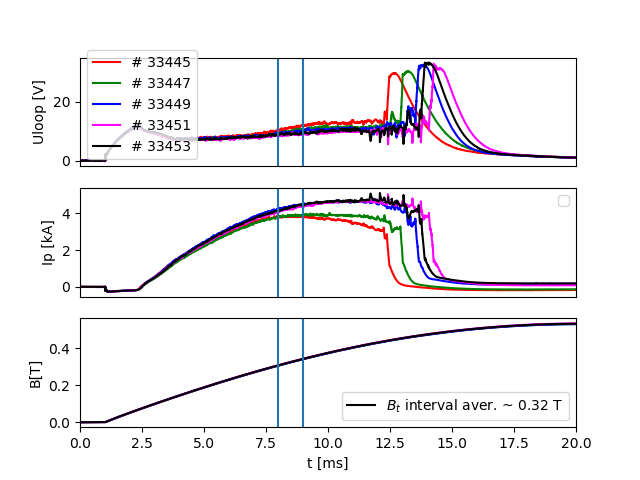

No handles with labels found to put in legend.


In [23]:
fig,ax = plt.subplots(3)
since = 8
until = 9
#ax[0].plto([],[], label='')
ax[0].plot(aa['Uloop_t'],aa['Uloop_V'],color = 'red', label='# ' + str(33445))
ax[0].plot(bb['Uloop_t'],bb['Uloop_V'],color = 'green', label='# ' + str(33447))
ax[0].plot(cc['Uloop_t'],cc['Uloop_V'],color = 'blue', label='# ' + str(33449))
ax[0].plot(dd['Uloop_t'],dd['Uloop_V'],color = 'magenta', label='# ' + str(33451))
ax[0].plot(ee['Uloop_t'],ee['Uloop_V'],color = 'black', label='# ' + str(33453))
ax[0].set_xticks([])
ax[0].set_ylabel('Uloop [V]')
ax[0].set_xlim(0,20)
ax[0].axvline(x = since)
ax[0].axvline(x = until)
ax[0].legend()

ax[1].plot(aa['Ip_t'],aa['Ip_I'],color = 'red')#, label='# ' + str(33445))
ax[1].plot(bb['Ip_t'],bb['Ip_I'],color = 'green')#, label='# ' + str(33447))
ax[1].plot(cc['Ip_t'],cc['Ip_I'],color = 'blue')#, label='# ' + str(33449))
ax[1].plot(dd['Ip_t'],dd['Ip_I'],color = 'magenta')#, label='# ' + str(33449))
ax[1].plot(ee['Ip_t'],ee['Ip_I'],color = 'black')#, label='# ' + str(33449))
ax[1].set_xticks([])
ax[1].set_ylabel('Ip [kA]')
ax[1].axvline(x = since)
ax[1].axvline(x = until)
ax[1].set_xlim(0,20)
ax[1].legend()

ax[2].plot(aa['B_t'],aa['B'], color = 'red')#, label='# ' + str(33445))
ax[2].plot(bb['B_t'],bb['B'], color = 'green')#, label='# ' + str(33447))
ax[2].plot(cc['B_t'],cc['B'], color = 'blue')#, label='# ' + str(33449))
ax[2].plot(dd['B_t'],dd['B'], color = 'magenta')#, label='# ' + str(33449))
st = nearest(ee['B_t'] , since)
ed = nearest(ee['B_t'] , until)

B_tor = (aa['B'][st] + aa['B'][ed])/2
alpha_lp = 2.7
alpha_calc = alpha_lp - (1.89*B_tor + 1.85) 
ax[2].plot(ee['B_t'],ee['B'], color = 'black', label = '$B_t$ interval aver. ~ '+str('{0:4.2f}'.format(B_tor)+' T'))#, label='# ' + str(33449))
ax[2].set_xlabel('t [ms]')
ax[2].set_ylabel('B[T]')
ax[2].axvline(x = since)
ax[2].axvline(x = until)
ax[2].set_xlim(0,20)
ax[2].legend(loc ='lower right')
fig.savefig('ALL_param_comparation.png' )

# RFA-Like measurement

In [24]:
def RFA_Like_IV(V, Isat, Vp_probe, Ti):
    return Isat*np.exp((Vp_probe-V)/Ti )

def exp_fit(x, a,c):
    return a*np.exp((-x)/c)

def lin_fit(x, a,c):
    return (x)/a +c
def bin_average(current, voltage):

    voltage_bins = np.arange(-20 , 201 , 1)
    current_bins_mean = []
    voltage_bins_mean = []
    current_bins_std = []
    voltage_bins_std = []
    
    for i, voltage_bin in enumerate(voltage_bins):
        bin_condition = np.where(V == voltage_bin)
        current_bins_mean.append(np.mean(I[bin_condition]))
        voltage_bins_mean.append(np.mean(V[bin_condition]))
        current_bins_std.append(np.std(current[bin_condition]))
        voltage_bins_std.append(np.std(voltage[bin_condition]))
        
    return {'I': np.array(current_bins_mean), 'V': np.array(voltage_bins_mean), 'I_err': current_bins_std, 'V_err': voltage_bins_std}


In [25]:
Ti = np.concatenate((np.array(a['Ti']),np.array(b['Ti']),np.array(c['Ti']),np.array(d['Ti']),np.array(e['Ti'])    ),axis=0)
Ti_err = np.concatenate((np.array(a['Ti_err']),np.array(b['Ti_err']),np.array(c['Ti_err']),np.array(d['Ti_err']),np.array(e['Ti_err'])    ),axis=0)
Vp_probe = np.concatenate((np.array(a['Vp']),np.array(b['Vp']),np.array(c['Vp']),np.array(d['Vp']),np.array(e['Vp'])    ),axis=0)
Vp_err = np.concatenate((np.array(a['Vp_err']),np.array(b['Vp_err']),np.array(c['Vp_err']),np.array(d['Vp_err']),np.array(e['Vp_err'])    ),axis=0)
Isat = -1*np.concatenate((np.array(a['Isat']),np.array(b['Isat']),np.array(c['Isat']),np.array(d['Isat']),np.array(e['Isat'])    ),axis=0)
r_norm = np.concatenate((np.array(a['Ti_positions']),np.array(b['Ti_positions']),np.array(c['Ti_positions']),np.array(d['Ti_positions']),np.array(e['Ti_positions'])    ),axis=0)

In [26]:
data = np.random.rand(6, len(Ti))
data[0,:] = np.array(Ti)
data[1,:] = np.array(Ti_err)
data[2,:] = np.array(Vp_probe)
data[3,:] = np.array(Vp_err)
data[4,:] = np.array(Isat)
data[5,:] = np.array(r_norm)
locs = ['Ti', 'Ti_err', 'Vp_probe','Vp_err','Isat','r_norm']
Axis = r_norm
da = xr.DataArray(data, coords = [locs,Axis], dims = [ 'data','position'])


In [27]:
begin = 60
end = 80
intervals = []

for j in range(begin,end-5,5):
    interval = da.sel(position= j)
    intervals.append(interval) 

In [28]:
da.sel(position=75)

<xarray.DataArray (data: 6, position: 2)>
array([[3.12936153e+01, 1.45327374e+01],
       [1.37973534e+01, 1.07500052e+01],
       [2.51933053e+01, 1.46151111e+01],
       [1.56894257e+01, 1.04736777e+01],
       [1.46937963e-02, 8.54832426e-03],
       [7.50000000e+01, 7.50000000e+01]])
Coordinates:
  * data      (data) <U8 'Ti' 'Ti_err' 'Vp_probe' 'Vp_err' 'Isat' 'r_norm'
  * position  (position) float64 75.0 75.0

<IPython.core.display.Javascript object>


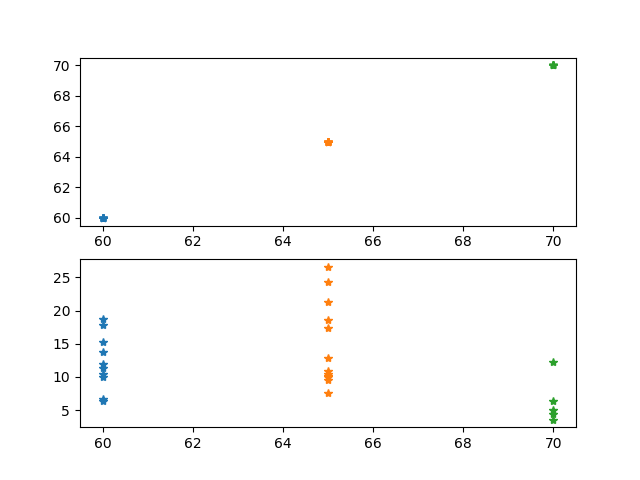

In [29]:
fig, ax = subplots(2,1)
for i in range(len(intervals)):
    ax[0].plot(intervals[i]['position'], intervals[i].values[5],'*')
    ax[1].plot(intervals[i].values[5], intervals[i].values[0],'*')

In [20]:
intervals[1]

<xarray.DataArray (data: 6, position: 12)>
array([[1.08720349e+01, 2.65863014e+01, 1.29063484e+01, 1.00218741e+01,
        2.42739481e+01, 2.13017051e+01, 1.02233314e+01, 1.73495902e+01,
        7.54869324e+00, 1.04057759e+01, 1.85703269e+01, 9.61409659e+00],
       [1.64282141e+00, 7.56793525e+00, 7.34858103e+00, 4.45024151e+00,
        7.66400230e+00, 1.07837751e+01, 3.92969021e+00, 9.04733281e+00,
        4.71737311e+00, 4.12843651e+00, 7.62323976e+00, 5.19144907e+00],
       [2.32136332e+01, 3.64215964e+01, 2.78723799e+01, 2.07564298e+01,
        2.76447940e+01, 2.50429240e+01, 2.55426836e+01, 2.27997665e+01,
        2.10784044e+01, 1.84179165e+01, 3.05679722e+01, 2.52255500e+01],
       [5.53023139e-01, 9.90588798e+00, 1.14077435e+00, 1.11865258e+00,
        1.50051690e+01, 1.53235918e+01, 9.79102791e-01, 3.99206906e+00,
        1.31862326e+00, 6.26026254e-01, 1.03307191e+01, 2.26413934e+00],
       [4.86686960e-03, 1.30864771e-02, 6.98129352e-03, 2.99911327e-02,
        2.19933467e-02, 2.74659030e-02, 8.45304683e-03, 1.36768289e-02,
        9.51284603e-03, 2.39850832e-02, 3.33343949e-02, 1.44311088e-02],
       [6.50000000e+01, 6.50000000e+01, 6.50000000e+01, 6.50000000e+01,
        6.50000000e+01, 6.50000000e+01, 6.50000000e+01, 6.50000000e+01,
        6.50000000e+01, 6.50000000e+01, 6.50000000e+01, 6.50000000e+01]])
Coordinates:
  * data      (data) <U8 'Ti' 'Ti_err' 'Vp_probe' 'Vp_err' 'Isat' 'r_norm'
  * position  (position) float64 65.0 65.0 65.0 65.0 ... 65.0 65.0 65.0 65.0

In [30]:
# index_reg= intervals[0]
# def IVs_maker(interval):
#     I = []
#     V = []
#     I_satplot = []
#     V_satplot = []
#     I_pp = []
#     V_pp = []
#     Ti_pp =[]
#     Plasma_potential_mean = []
#     for i in range(len(interval.values[4])):
#         mean_position = np.mean(interval.values[5])
#         Plasma_potential_mean = np.mean(interval.values[2])
#         Plasma_potential = int(interval.values[2][i])
#         for n in range(-20,Plasma_potential,2):
#             V_satplot.append(n)
#             I_satplot.append(interval.values[4][i])
#         V_pp.append(n)
#         I_pp.append(interval.values[4][i])
#         Ti_pp.append(interval.values[0][i])

#         for j in range(Plasma_potential,201,1):
#             V.append(j)
#             I.append(RFA_Like_IV(j, interval.values[4][i], interval.values[2][i], interval.values[0][i]))
#     return {'I': I, 'V': V, 'Vp' : Plasma_potential_mean, 'mean_position':mean_position, 'V_satplot': V_satplot,'I_satplot':I_satplot , 'I_pp':I_pp, 'V_pp':V_pp,'Ti_pp':Ti_pp }

# V = np.array(IVs_maker(index_reg)['V'])
# I= np.array(IVs_maker(index_reg)['I'])
# I_satplot= np.array(IVs_maker(index_reg)['I_satplot'])
# V_satplot= np.array(IVs_maker(index_reg)['V_satplot'])
# V_pp = np.array(IVs_maker(index_reg)['V_pp'])
# I_pp = np.array(IVs_maker(index_reg)['I_pp'])
# Ti_pp = np.array(IVs_maker(index_reg)['Ti_pp'])
# Plasma_potential_mean = IVs_maker(index_reg)['Vp']

# fig, ax = subplots(1,1, figsize =(8,6))
# #ax.set_title('#7029 ;  time: ' +str(np.int(index_reg.time[0].values))+ ' - '+str(np.int(index_reg.time[-1].values)+1) + ' ms')
# #ax.plot([] , [], ' ',label ='# ;  position: ' +str(np.int(np.mean(interval.values[5]) + ' mm')))

# ax.plot(V, I, 'o', color = 'gray',markersize=1.5, alpha = 1, label = 'reconstructed I-V' )
# ax.plot(V_satplot, I_satplot, 'o', color = 'gray',markersize=1.5, alpha = 1 )
# #ax.plot(V_pp, I_pp, 'o', color = 'black',markersize=4, alpha = 1 , label = '$\phi$ of reconstructed I-V')

# #ax.set_ylim(0,0.08)
# ax.set_xlim(-20,200)
# def IVs_maker(interval):
#     I = []
#     V = []
#    # Plasma_potential = int(np.mean(Vp_probe[index_reg]))
#     for i in range(len(interval.values[4])):
#         mean_position = np.mean(interval.values[5])
#         Plasma_potential = int(interval.values[2][i])
#         Ti_mean = np.mean(interval.values[0])
#         Ti_mean_std = np.std(interval.values[0])
#         for n in range(-20,Plasma_potential+0, 1):
#             V.append(n)
#             I.append(interval.values[4][i])
#             continue
#         for j in range(Plasma_potential,201,1):
#             V.append(j)
#             I.append(RFA_Like_IV(j, interval.values[4][i], interval.values[2][i], interval.values[0][i]))
#     return {'I': I, 'V': V, 'mean_position':mean_position,'Ti_mean':Ti_mean , 'Ti_mean_std':Ti_mean_std}

# V = np.array(IVs_maker(index_reg)['V'])
# I= np.array(IVs_maker(index_reg)['I'])
# Ti_mean = IVs_maker(index_reg)['Ti_mean']
# Ti_mean_std = IVs_maker(index_reg)['Ti_mean_std']

# binned_data = bin_average(I,V) 
# V_aver = binned_data['V']
# I_aver = binned_data['I']
# ierrs  = binned_data['I_err']

# low_index = nearest(I_aver, np.exp(-1)*I_aver[0])
# hi_index = nearest(I_aver, np.exp(-4)*I_aver[0])

# ax.plot(V_aver,I_aver, linewidth = 10, color= 'blue' , label = 'average I-V characteristic' , alpha = 1)
# popt, pcov = curve_fit(exp_fit, V_aver[low_index:], I_aver[low_index:], bounds=([1e-4,5], [1., 150]))
# #popt, pcov = curve_fit(exp_fit, V_aver[low_index:], I_aver[low_index:], p0=(0.05, 50), method = 'dogbox')#, sigma= np.sqrt(I_aver[low_index:]), absolute_sigma=False)
# popt_lin, pcov_lin = curve_fit(lin_fit, V_aver[low_index:], np.log(I_aver[low_index:]), bounds=([-150,-100], [0., 1]))

# x = V_aver[low_index:]
# alpha = popt_lin[1]
# A = np.exp(alpha)
# B = popt_lin[0]
# y = A*np.exp(x/B)


# ax.plot(x, exp_fit(V_aver[low_index:], popt[0], popt[1]), linewidth=6, color='red', label = 'exponential fit: $T_i$= ' + str("{:.1f}".format(popt[1])) +' $\pm$ ' +str("{:.1f}".format(np.sqrt(pcov[1][1])))+ ' eV')
# ax.plot(x, y, linewidth=6, color='green',label ='linear fit:  $T_i$= ' + str("{:.1f}".format(-popt_lin[0])) +' $\pm$ ' +str("{:.1f}".format(np.sqrt(pcov_lin[0][0])))+ ' eV')

# ax.axvline(x=Plasma_potential_mean, lineStyle= '--',linewidth=2 , color = "black", label = 'average $\phi =$'+str("{:.1f}".format(np.mean(V_pp)))+' V')
# #ax.set_yscale('log')
# ax.set_xlabel('Probe voltage [V]', fontsize=16)
# ax.set_ylabel('Probe current [A]', fontsize=16)
# ax.legend(loc='upper right', fontsize=12,  )
# ax.tick_params(axis='both' , labelsize=16)
# plt.savefig('RFA_LIKE_Example_'+str(IVs_maker(index_reg)['mean_position'])+'_m_shot'+str(7029)+'.png')
# print('mean position = '+str(IVs_maker(index_reg)['mean_position']))
# print('fit: from - to = '+str(np.min(V_aver[low_index:]))+ '[V] - ' +str(np.max(V_aver[low_index:]))+ '[V]')

<IPython.core.display.Javascript object>


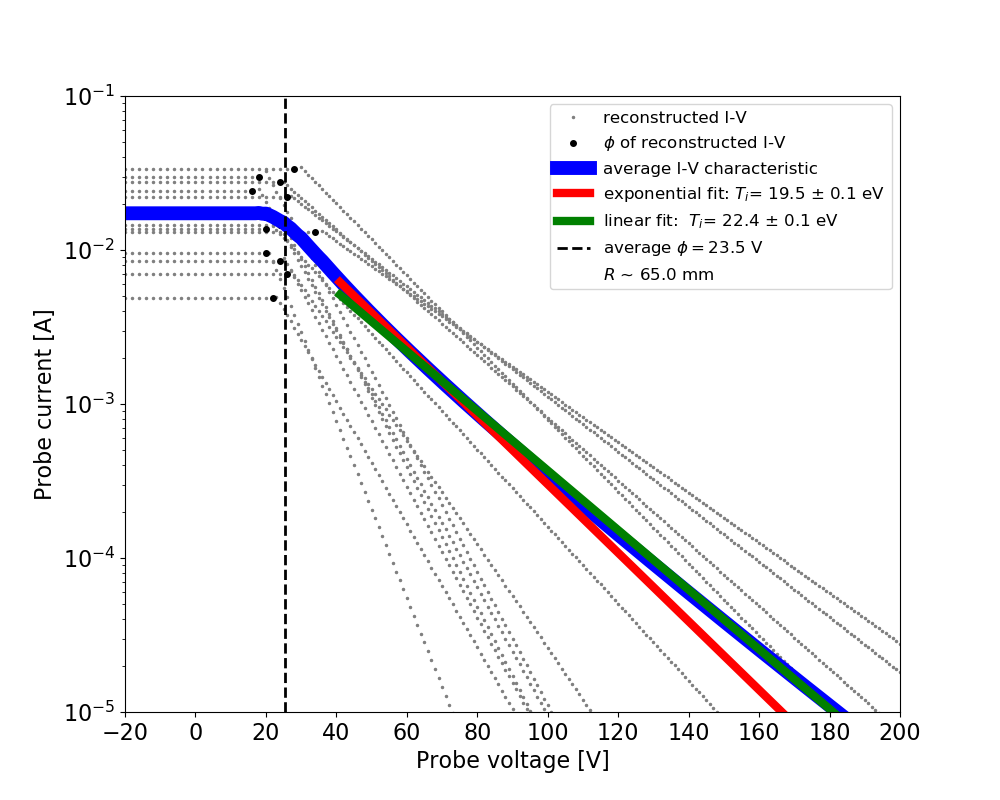

mean position = 65.0
fit: from - to = 41.0[V] - 200.0[V]


In [32]:
index_reg= intervals[1]
def IVs_maker(interval):
    I = []
    V = []
    I_satplot = []
    V_satplot = []
    I_pp = []
    V_pp = []
    Ti_pp =[]
    Plasma_potential_mean = []
    for i in range(len(interval.values[4])):
        mean_position = np.mean(interval.values[5])
        Plasma_potential_mean = np.mean(interval.values[2])
        Plasma_potential = int(interval.values[2][i])
        for n in range(-20,Plasma_potential,2):
            V_satplot.append(n)
            I_satplot.append(interval.values[4][i])
        V_pp.append(n)
        I_pp.append(interval.values[4][i])
        Ti_pp.append(interval.values[0][i])

        for j in range(Plasma_potential,201,1):
            V.append(j)
            I.append(RFA_Like_IV(j, interval.values[4][i], interval.values[2][i], interval.values[0][i]))
    return {'I': I, 'V': V, 'Vp' : Plasma_potential_mean, 'mean_position':mean_position, 'V_satplot': V_satplot,'I_satplot':I_satplot , 'I_pp':I_pp, 'V_pp':V_pp,'Ti_pp':Ti_pp }

V = np.array(IVs_maker(index_reg)['V'])
I= np.array(IVs_maker(index_reg)['I'])
I_satplot= np.array(IVs_maker(index_reg)['I_satplot'])
V_satplot= np.array(IVs_maker(index_reg)['V_satplot'])
V_pp = np.array(IVs_maker(index_reg)['V_pp'])
I_pp = np.array(IVs_maker(index_reg)['I_pp'])
Ti_pp = np.array(IVs_maker(index_reg)['Ti_pp'])
Plasma_potential_mean = IVs_maker(index_reg)['Vp']

fig, ax = subplots(1,1, figsize =(10,8))
# ax.plot([] , [], ' ',label ='#7029 ;  time: ' +str(np.int(index_reg.time[0].values))+ ' - '+str(np.int(index_reg.time[-1].values)+1) + ' ms')

ax.semilogy(V, I, 'o', color = 'gray',markersize=1.5, alpha = 1, label = 'reconstructed I-V' )
ax.semilogy(V_satplot, I_satplot, 'o', color = 'gray',markersize=1.5, alpha = 1 )
ax.semilogy(V_pp, I_pp, 'o', color = 'black',markersize=4, alpha = 1 , label = '$\phi$ of reconstructed I-V')

# ax.set_ylim(0,0.08)
# ax.set_xlim(0,200)
def IVs_maker(interval):
    I = []
    V = []
   # Plasma_potential = int(np.mean(Vp_probe[index_reg]))
    for i in range(len(interval.values[4])):
        mean_position = np.mean(interval.values[5])
        Plasma_potential = int(interval.values[2][i])
        Ti_mean = np.mean(interval.values[0])
        Ti_mean_std = np.std(interval.values[0])
        for n in range(-20,Plasma_potential+0, 1):
            V.append(n)
            I.append(interval.values[4][i])
            continue
        for j in range(Plasma_potential,201,1):
            V.append(j)
            I.append(RFA_Like_IV(j, interval.values[4][i], interval.values[2][i], interval.values[0][i]))
    return {'I': I, 'V': V, 'mean_position':mean_position,'Ti_mean':Ti_mean , 'Ti_mean_std':Ti_mean_std}

V = np.array(IVs_maker(index_reg)['V'])
I= np.array(IVs_maker(index_reg)['I'])
Ti_mean = IVs_maker(index_reg)['Ti_mean']
Ti_mean_std = IVs_maker(index_reg)['Ti_mean_std']

binned_data = bin_average(I,V) 
V_aver = binned_data['V']
I_aver = binned_data['I']
ierrs  = binned_data['I_err']

low_index = nearest(I_aver, np.exp(-1)*I_aver[0])
hi_index = nearest(I_aver, np.exp(-4)*I_aver[0])

ax.semilogy(V_aver,I_aver, linewidth = 10, color= 'blue' , label = 'average I-V characteristic' , alpha = 1)
popt, pcov = curve_fit(exp_fit, V_aver[low_index:], I_aver[low_index:], bounds=([1e-4,5], [1., 150]))
#popt, pcov = curve_fit(exp_fit, V_aver[low_index:], I_aver[low_index:], p0=(0.05, 50), method = 'dogbox')#, sigma= np.sqrt(I_aver[low_index:]), absolute_sigma=False)
popt_lin, pcov_lin = curve_fit(lin_fit, V_aver[low_index:], np.log(I_aver[low_index:]), bounds=([-150,-100], [0., 1]))

x = V_aver[low_index:]
alpha = popt_lin[1]
A = np.exp(alpha)
B = popt_lin[0]
y = A*np.exp(x/B)


ax.semilogy(x, exp_fit(V_aver[low_index:], popt[0], popt[1]), linewidth=6, color='red', label = 'exponential fit: $T_i$= ' + str("{:.1f}".format(popt[1])) +' $\pm$ ' +str("{:.1f}".format(np.sqrt(pcov[1][1])))+ ' eV')
ax.semilogy(x, y, linewidth=6, color='green',label ='linear fit:  $T_i$= ' + str("{:.1f}".format(-popt_lin[0])) +' $\pm$ ' +str("{:.1f}".format(np.sqrt(pcov_lin[0][0])))+ ' eV')

ax.axvline(x=Plasma_potential_mean, lineStyle= '--',linewidth=2 , color = "black", label = 'average $\phi =$'+str("{:.1f}".format(np.mean(V_pp)))+' V')
ax.set_ylim(10**-5,10**-1)
ax.set_xlim(-20,200)
ax.plot([] , [], ' ',label ='$R$ ~ '+str(IVs_maker(index_reg)['mean_position'])+ ' mm')
ax.set_xlabel('Probe voltage [V]', fontsize=16)
ax.set_ylabel('Probe current [A]', fontsize=16)
ax.legend(loc='upper right', fontsize=12 )
ax.tick_params(axis='both' , labelsize=16)
x_ticks = np.arange(-20, 201, 20)
ax.set_xticks(x_ticks)
plt.savefig('RFA_LIKE_Example_'+str(IVs_maker(index_reg)['mean_position'])+'_m_shot'+str(7029)+'.png')
print('mean position = '+str(IVs_maker(index_reg)['mean_position']))
print('fit: from - to = '+str(np.min(V_aver[low_index:]))+ '[V] - ' +str(np.max(V_aver[low_index:]))+ '[V]')

In [37]:
Results_lin_Ti = []
Results_lin_Ti_err = []
Results_exp_Ti = []
Results_exp_Ti_err = []
Positions = []
Ti_means = []
Ti_mean_stds = []

for i in range(len(intervals)):
    index_reg= intervals[i]
    V = np.array(IVs_maker(index_reg)['V'])
    I= np.array(IVs_maker(index_reg)['I'])
    Ti_mean = IVs_maker(index_reg)['Ti_mean']
    Ti_mean_std = IVs_maker(index_reg)['Ti_mean_std']
    
    binned_data = bin_average(I,V) 
    V_aver = binned_data['V']
    I_aver = binned_data['I']
    ierrs  = binned_data['I_err']
    mean_position = IVs_maker(index_reg)['mean_position']
    low_index = nearest(I_aver, np.exp(-1.)*I_aver[0])
    #hi_index = nearest(I_aver, np.exp(-4)*I_aver[0])

    popt2, pcov2 = curve_fit(exp_fit, V_aver[low_index:], I_aver[low_index:], bounds=([0,0], [1., 300]), p0=(0.05, 50))#, sigma= np.sqrt(I_aver[low_index:]), absolute_sigma=False)
    popt_lin, pcov_lin = curve_fit(lin_fit, V_aver[low_index:], np.log(I_aver[low_index:]), bounds=(-100, [1., 1]))

    alpha = popt_lin[1]
    A = np.exp(alpha)
    B = -popt_lin[0]
    
    Results_lin_Ti.append(B)
    Results_lin_Ti_err.append(np.sqrt(pcov_lin[0][0]))
    Results_exp_Ti.append(popt2[1])
    Results_exp_Ti_err.append(np.sqrt(pcov2[1][1]))
    Positions.append(mean_position)
    Ti_means.append(Ti_mean)
    Ti_mean_stds.append(Ti_mean_std)

<IPython.core.display.Javascript object>


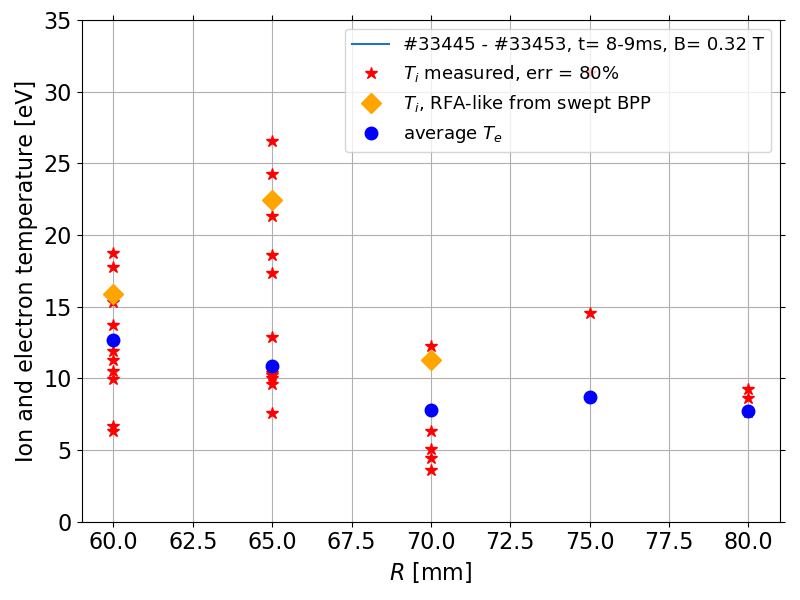

In [39]:
fig, ax = subplots(1,1, figsize =(8,6))
size = 9
ax.plot([],[], label ='#33445 - #33453, t= 8-9ms, B= 0.32 T')
ax.plot(c['Ti_positions'], c['Ti'], '*',markersize = size, color = 'red', label = '$T_i$ measured, err = 80%')
ax.plot(a['Ti_positions'], a['Ti'], '*',markersize = size, color = 'red',)
ax.plot(b['Ti_positions'], b['Ti'], '*',markersize = size, color = 'red',)
ax.plot(d['Ti_positions'], d['Ti'], '*',markersize = size, color = 'red',)
ax.plot(e['Ti_positions'], e['Ti'], '*',markersize = size, color = 'red',)

ax.plot(Positions ,Results_lin_Ti,'D', color = 'orange', markersize = 10 , label = '$T_i$, RFA-like from swept BPP')
#ax.errorbar(Positions, Results_lin_Ti, yerr=Results_lin_Ti_err, xerr=None, fmt='None', ecolor='red', elinewidth=5, capsize=8, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None,zorder =3 )


ax.plot(a['Ti_positions'][0], np.mean(a['Te']), 'o',markersize = size, color = 'blue',label = 'average $T_e$ ')
ax.plot(b['Ti_positions'][0], np.mean(b['Te']), 'o', markersize = size, color = 'blue')
ax.plot(c['Ti_positions'][0], np.mean(c['Te']), 'o',markersize = size,  color = 'blue')
ax.plot(d['Ti_positions'][0], np.mean(d['Te']), 'o',markersize = size,  color = 'blue')
ax.plot(e['Ti_positions'][0], np.mean(e['Te']), 'o',markersize = size,  color = 'blue')

# plt.errorbar(a['Ti_positions'][0], np.mean(a['Ti']), yerr=np.std(a['Ti']),zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1.5, capsize=4, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=1, )
# plt.errorbar(b['Ti_positions'][0], np.mean(b['Ti']), yerr=np.std(b['Ti']),zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1.5, capsize=4, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=1, )
# plt.errorbar(c['Ti_positions'][0], np.mean(c['Ti']), yerr=np.std(c['Ti']),zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1.5, capsize=4, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=1, )
# plt.errorbar(d['Ti_positions'][0], np.mean(d['Ti']), yerr=np.std(d['Ti']),zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1.5, capsize=4, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=1, )
# plt.errorbar(e['Ti_positions'][0], np.mean(e['Ti']), yerr=np.std(e['Ti']),zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1.5, capsize=4, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=1, )

# plt.errorbar(e['Ti_positions'], e['Ti'], yerr = e['Ti_err'],zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1., capsize=4, barsabove=True, errorevery=1, capthick=1, )
# plt.errorbar(a['Ti_positions'], a['Ti'], yerr = a['Ti_err'],zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1., capsize=4, barsabove=True, errorevery=1, capthick=1, )
# plt.errorbar(b['Ti_positions'], b['Ti'], yerr = b['Ti_err'],zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1., capsize=4, barsabove=True, errorevery=1, capthick=1, )
# plt.errorbar(c['Ti_positions'], c['Ti'], yerr = c['Ti_err'],zorder =3, xerr=None, fmt='None', ecolor='red',  elinewidth=1., capsize=4, barsabove=True, errorevery=1, capthick=1, )
# plt.errorbar(d['Ti_positions'], d['Ti'], yerr = d['Ti_err'],zorder =3, xerr=None, fmt='None', ecolor='red', elinewidth=1., capsize=4, barsabove=True, errorevery=1, capthick=1, )

plt.legend(loc = 'upper right',fontsize = 13)
plt.xlabel('$R$ [mm]', fontsize = 16)
plt.ylabel('Ion and electron temperature [eV]', fontsize = 16)
plt.tick_params(axis='both' , labelsize=16, top = True, right = True)
plt.grid()
plt.tight_layout()
ax.set_ylim(0,35)

fig.savefig('radial_profile.png')